<a href="https://colab.research.google.com/github/mungaimoureen/Spam-week9-IP/blob/main/Moringa_Data_Science_Core_IP__week__9_Moureen_Mungai__Core_KNN_Classifier_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN CLASSIFIER

## Defining the Question

### a) Specifying the Data Analytic Question

Build a kNN model classifier and compute the resulting metrics.

### b) Defining the Metric for Success

The project will be deemed successful if we are able to successfully build a kNN model classifier.

### c) Understanding the Context




The availed dataset fro the study gives information on the titanic accident. 
It contains columns that state the age, name, gender and survival status of the passengers. 

### d) Experimental Design

The steps to be taken are as follows:

1. Data Cleaning

2. Exploratory Data Analysis

3. Modelling: kNN Classifier

4. Conclusion

### e) Data Relevance

The dataset availed is relevant for this study. 

## Reading the Data

In [ ]:
# Importing the relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [ ]:
# Loading the datasets

train_df = pd.read_csv('/content/train (5).csv')

# Previewing the top 
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_df = pd.read_csv('/content/test (1).csv')

# Previweing the top of this dataset
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# Previewing the bottom of train dataset

train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
# Previewing the bottom of test dataset

test_df.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
# Checking the info

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# info about the test dataset

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
# checking the shapes of the datasets
train_df.shape,test_df.shape

((891, 12), (418, 11))

## Tidying the Data 

In [ ]:
#Setting passengerID as index in train data

train_df.set_index('PassengerId',inplace=True)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Setting passengerID as index in test data

test_df.set_index('PassengerId',inplace=True)
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


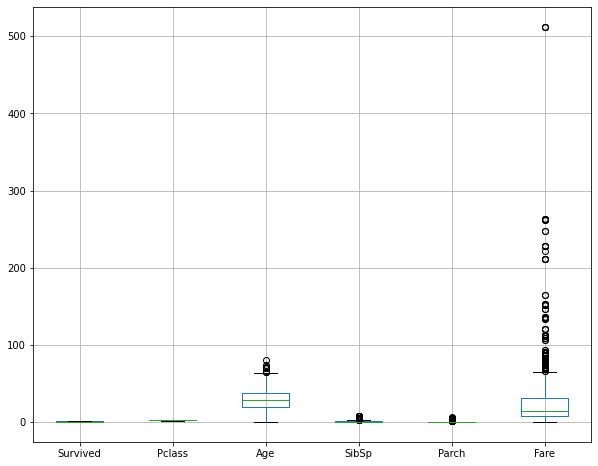

In [ ]:
# Plotting to check for outliers in the train dataset

cols=['Survived','Pclass','Age','SibSp','Parch', 'Fare']

plt.subplots(figsize=(10,8))
train_df.boxplot(cols)
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


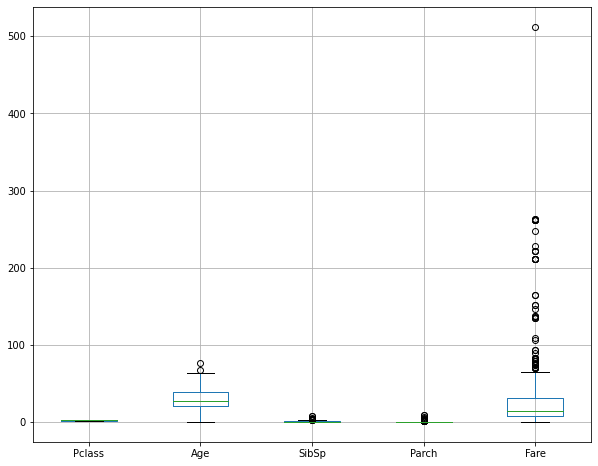

In [ ]:
# Checking outliers in the test dataset

cols=['Pclass','Age','SibSp','Parch', 'Fare']

plt.subplots(figsize=(10,8))
test_df.boxplot(cols)
plt.show()


* We shall not drop the outliers since we take them to be truthful points. 

In [ ]:
# Checking for null values in the train dataset

train_df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
# Null values in the test data

test_df.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [ ]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Filling the null values with the modal value

train_df = train_df.fillna(train_df.mode().iloc[0])

# Checking to see if there are null values
train_df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [ ]:
test_df = test_df.fillna(test_df.mode().iloc[0])

# Checking to see if there are null values
test_df.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [ ]:
# Checking for duplicated entries

train_df.duplicated().sum()

0

In [ ]:
test_df.duplicated().sum()

0

* There are no duplicates in our data. 

## Exploratory Data Analysis

**Univariate Analysis**

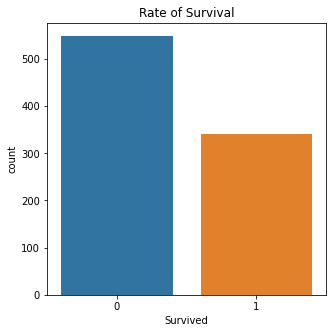

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot to show survival rate
plt.figure(figsize=(5,5))
sns.countplot(x='Survived', data=train_df)
plt.title('Rate of Survival')
plt.show()

* We can see that many people did not survive. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


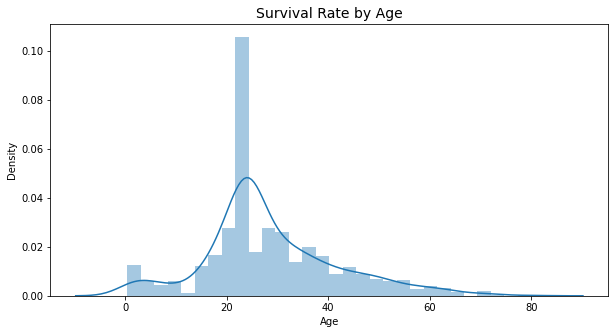

In [ ]:
# Distribution plot to show the survival rate by age 

plt.figure(figsize=(10,5))
sns.distplot(train_df['Age'])
plt.title('Survival Rate by Age', fontsize=14)
plt.show()

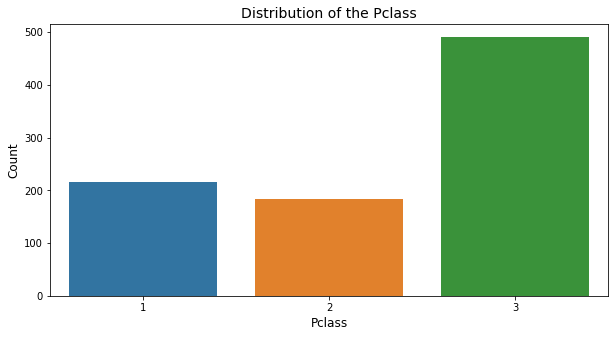

In [ ]:
# Bar plot
plt.figure(figsize=(10,5))
sns.countplot(x='Pclass', data=train_df)
plt.title('Distribution of the Pclass', fontsize=14)
plt.xlabel('Pclass', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

**Bivariate Analysis**

Text(0, 0.5, 'Survived')

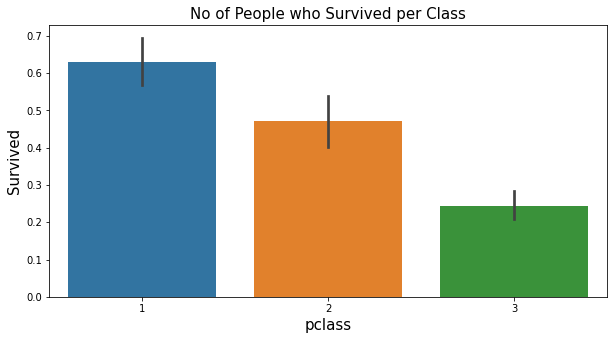

In [ ]:
#Bar chart for pclass vs survived
plt.figure(figsize=(10,5))
ax = sns.barplot(x="Pclass", y="Survived", data=train_df)
plt.title('No of People who Survived per Class',fontsize=15)
plt.xlabel('pclass', fontsize=15)
plt.ylabel('Survived',fontsize=15)

Text(0, 0.5, 'Survived')

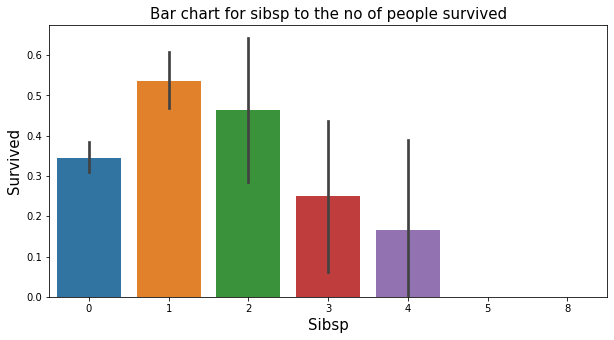

In [ ]:
# sibsp vs survived
plt.figure(figsize=(10,5))
ax = sns.barplot(x="SibSp", y="Survived", data=train_df)
plt.title('Bar chart for sibsp to the no of people survived',fontsize=15)
plt.xlabel('Sibsp',fontsize=15)
plt.ylabel('Survived',fontsize=15)

**Correlation**

In [ ]:
# Checking for multicolliniearity

train_df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.052872,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.356187,0.083081,0.018443,-0.549500
Age,-0.052872,-0.356187,1.000000,-0.232411,-0.155118,0.107554
SibSp,-0.035322,0.083081,-0.232411,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.155118,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.107554,0.159651,0.216225,1.000000


In [ ]:
test_df.corr()

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.503026,0.001087,0.018721,-0.577491
Age,-0.503026,1.000000,-0.054656,-0.040213,0.363797
SibSp,0.001087,-0.054656,1.000000,0.306895,0.172034
Parch,0.018721,-0.040213,0.306895,1.000000,0.230411
Fare,-0.577491,0.363797,0.172034,0.230411,1.000000


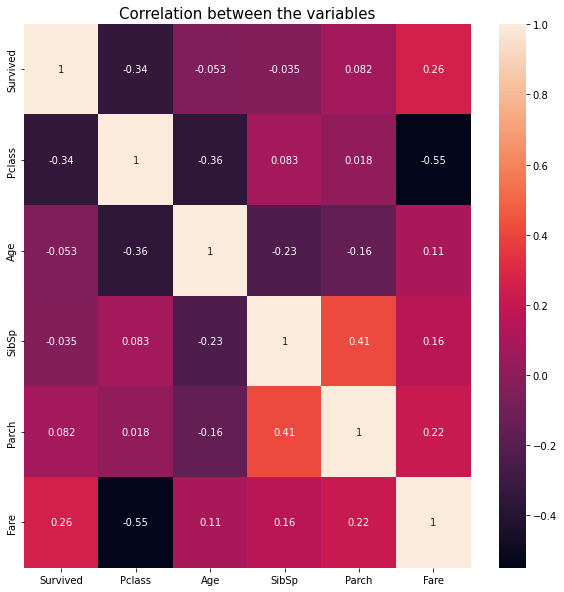

In [ ]:
# plotting the correlation using a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(train_df.corr(),annot=True)
plt.title('Correlation between the variables',fontsize=15)
plt.show()

## Modelling

### 80:20 Segmentation

In [ ]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [ ]:
# Dropping the irrelevant columns

train_df.drop({'Name','Ticket'},axis=1,inplace=True)

In [ ]:
## Encoding the categorical and non-numerical data

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in columns

#colmns = ['Sex', 'Cabin', 'Embarked']
#train_df[colmns]= label_encoder.fit_transform(train_df[colmns])

train_df['Sex']= label_encoder.fit_transform(train_df['Sex'])
train_df['Cabin']= label_encoder.fit_transform(train_df['Cabin'])
train_df['Embarked']= label_encoder.fit_transform(train_df['Embarked'])


In [ ]:
# Defining our dependent and independent variables 

X = train_df.drop(['Survived'],axis=1).values
y = train_df['Survived'].values

In [ ]:
# Splitting our data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
# Scaling our data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Training our model
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# Making predictions using our classifier

y_pred = clf.predict(X_test)


In [ ]:
# Checking the mean squared error

print(mean_squared_error(y_test, y_pred))

0.2011173184357542


In [ ]:
#Checking the accuracy score 

from sklearn import metrics
print('Accuracy of KNN classifier:{}'.format(clf.score(X_test, y_test)))

Accuracy of KNN classifier:0.7988826815642458


* The 80:20 partition data gives predictions with an accuracy score of 79%. 

Text(0, 0.5, 'Error Rate')

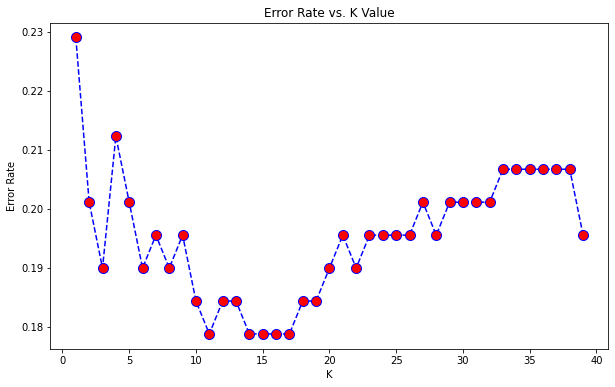

In [ ]:
# Visualizing 
#Choosing a K Value
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
#getting scores
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 60)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.770949720670391, 0.7988826815642458, 0.8100558659217877, 0.7877094972067039, 0.7988826815642458, 0.8100558659217877, 0.8044692737430168, 0.8100558659217877, 0.8044692737430168, 0.8156424581005587, 0.8212290502793296, 0.8156424581005587, 0.8156424581005587, 0.8212290502793296, 0.8212290502793296, 0.8212290502793296, 0.8212290502793296, 0.8156424581005587, 0.8156424581005587, 0.8100558659217877, 0.8044692737430168, 0.8100558659217877, 0.8044692737430168, 0.8044692737430168, 0.8044692737430168, 0.8044692737430168, 0.7988826815642458, 0.8044692737430168, 0.7988826815642458, 0.7988826815642458, 0.7988826815642458, 0.7988826815642458, 0.7932960893854749, 0.7932960893854749, 0.7932960893854749, 0.7932960893854749, 0.7932960893854749, 0.7932960893854749, 0.8044692737430168, 0.7988826815642458, 0.8044692737430168, 0.8044692737430168, 0.8044692737430168, 0.8044692737430168, 0.8044692737430168, 0.7988826815642458, 0.7988826815642458, 0.8100558659217877, 0.8156424581005587, 0.8156424581005587, 

### 70:30 Segmentation

In [ ]:
# Splitting the data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
# Scaling the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Training the model

from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# Prediction

y_pred = clf.predict(X_test)

# Printing the mean squared error
print(mean_squared_error(y_test, y_pred))


0.19029850746268656


In [ ]:
#from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
print('Accuracy of KNN classifier:{}'.format(clf.score(X_test, y_test)))

Accuracy of KNN classifier:0.8097014925373134


* Using this segmentation of data, the MSE reduces to 19% while the accuracy score increases to 80%.

### 60:40 Segmentation

In [ ]:
# Splitting the data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [ ]:
# Scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Training the model
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# Prediction

y_pred = clf.predict(X_test)

# Printing the mean squared error
print(mean_squared_error(y_test, y_pred))

0.17366946778711484


In [ ]:
#from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
print('Accuracy of KNN classifier:{}'.format(clf.score(X_test, y_test)))

Accuracy of KNN classifier:0.8263305322128851


* On using these partitions the accuracy of the model increases to 82%!

## HyperParameter Tuning

In [ ]:
# import GridSearchCV

from sklearn.model_selection import GridSearchCV

k_range=range(1,31)
print(k_range)
param_grid=dict(n_neighbors=k_range)
print (param_grid)
#
grid_search = GridSearchCV(clf,param_grid,cv=10,scoring='accuracy')
#
grid_search.fit(X_train, y_train)

range(1, 31)
{'n_neighbors': range(1, 31)}


GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 31)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring='accuracy',
             verbose=0)

In [ ]:
# examining the best model
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}'.format(grid_search.best_score_))
# print parameters that give the best results
print('Parameters that give the best results :', (grid_search.best_params_))
# print estimator that was chosen by the GridSearch
print('Estimator that was chosen by the search :', (grid_search.best_estimator_))

GridSearch CV best score : 0.8073
Parameters that give the best results : {'n_neighbors': 5}
Estimator that was chosen by the search : KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


* The model performs best when the n_neighbors is set to 5. 

## Results and Conclusion

Below is a summary of the performance per model:

80:20 - Model accuracy score: 0.7988

70:30 - Model accuracy score: 0.8097

60:40 - Model accuracy score: 0.8263

From the three segments, the model that was more accurate was the one divided into 60:40 sets with a score of 82%.